## define MDD definition- select a subeset for MDD and Select a match control subset

In [1]:
import pandas as pd
import numpy as np
import nibabel as nib
import os
import pandas as pd
import os
import shutil

In [2]:
metadata = pd.read_csv(
    '/data/zmohaghegh/Desktop/metadata.csv',
    index_col='f.eid',
)

/data/zmohaghegh/venv/lib64/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (8,14,230,251,439,445,451,454,457,460,463,466,469,472,475,484,501,502,503,505,506,508,511,514,517,520,523,526,529,532,535,538,541,544,547,550,553,556,559,562,565,568,571,574,577,580,583,586,589,592,595,598,601,604,606,607,608,609,610,611,615,616,617,624,625,626,630,631,632,633,634,635,642,643,644,645,646,647,649,651,652,653,654,655,656,657,658,659,663,664,665,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,685,686,693,694,696,697,698,703,704,708,709,710,711,712,726,727,728,732,733,734,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1263,1265,1275,1276,1278,1279,1284,1285,1293,1294,1296,1297,1299,1300,1302,1303,1323,1324,1326,

In [3]:
metadata.head()

,f.31.0.0,f.34.0.0,f.50.0.0,f.50.1.0,f.50.2.0,f.52.0.0,f.53.0.0,f.53.1.0,f.53.2.0,f.54.0.0,...,f.41251.0.8,f.41251.0.9,f.41251.0.10,f.41252.0.0,f.41253.0.0,f.41253.0.1,f.41253.0.2,f.41253.0.3,f.41253.0.4,f.41253.0.5
f.eid,,,,,,,,,,,,,,,,,,,,,
3290642,Female,1945,168.0,NaN,167.5,August,2009-10-19,NaN,2014-10-29,11016,...,NaN,NaN,NaN,8.0,6.0,18.0,NaN,NaN,NaN,NaN
1004750,Female,1957,173.0,172.0,173.0,March,2007-07-28,2012-08-22,2015-07-17,11001,...,NaN,NaN,NaN,39.0,6.0,18.0,NaN,NaN,NaN,NaN
2117620,Female,1950,155.4,NaN,156.0,March,2008-03-03,NaN,2018-08-14,11009,...,NaN,NaN,NaN,3.0,6.0,18.0,NaN,NaN,NaN,NaN
1641691,Male,1962,174.4,NaN,173.0,September,2008-07-16,NaN,2017-07-20,11009,...,NaN,NaN,NaN,1.0,6.0,NaN,NaN,NaN,NaN,NaN
3462460,Male,1949,168.0,NaN,165.0,June,2009-06-04,NaN,2017-10-06,11017,...,NaN,NaN,NaN,1.0,6.0,NaN,NaN,NaN,NaN,NaN


In [5]:
sub_metadata = metadata[[
    'f.2050.2.0', 'f.2060.2.0', 'f.20123.0.0', 'f.20124.0.0', 'f.20125.0.0', 'f.20435.0.0', 'f.20436.0.0',
    'f.20437.0.0', 'f.20439.0.0', 'f.20440.0.0', 'f.20441.0.0', 'f.20446.0.0', 'f.20449.0.0', 'f.20450.0.0',
    'f.20507.0.0', 'f.20508.0.0', 'f.20510.0.0', 'f.20511.0.0', 'f.20513.0.0', 'f.20514.0.0', 'f.20517.0.0',
    'f.20518.0.0', 'f.20519.0.0', 'f.20532.0.0',  'f.20536.0.0', 'f.34.0.0', 'f.31.0.0', 'f.6138.2.0', 'f.20016.2.0'
]].rename(columns={
    'f.31.0.0': 'sex',
    'f.34.0.0': 'birth year',
    'f.6138.2.0': 'education',
    'f.20016.2.0': 'intelligence'
})
sub_metadata.describe()

,birth year,intelligence
count,29313.000000,26537.000000
mean,1953.062191,6.682896
std,7.465074,2.070696
min,1936.000000,0.000000
25%,1947.000000,5.000000
50%,1952.000000,7.000000
75%,1959.000000,8.000000
max,1970.000000,13.000000


MDD definitions¶
sub_sample1 = (20123=='Yes' | 20124=='Yes' | 20125=='Yes') & (2050=='Nearly every day' | 2060=='Nearly every day')

sub_sample2 = (20123=='Yes' | 20124=='Yes' | 20125=='Yes') & ( 2050=='Nearly every day|More than half the days' | 2060=='Nearly every day|More than half the days' )

depression_ever_Davis = (20441 == 'yes' | 20446 == 'yes') & (20436 == 'most of the day' | 20436 == 'all day long') & ( 20439 == 'almost everyday' | 20439=='everyday') & (20440=='somewhat' | 20440=='alot') & ( 5 out of 20441, 20446, 20449, 20536=='gain|lost|gain_lost', 20532==?, 20435, 20450, 20437)

sub_sample3 = (20514, 20510, 20517, 20519, 20511=='poor appitide|overeating', 20510='feeling down|helpless|depressed', 20507, 20508, 20518, 20513 all number > 5 & half da y) & depression_ever_Davis

Guido_sub_sample = depression_ever_Davis & sub_sample2

https://biobank.ctsu.ox.ac.uk/crystal/label.cgi?id=138

Field ID	Description

20446	Ever had prolonged feelings of sadness or depression
20441	Ever had prolonged loss of interest in normal activities
20547	Activities undertaken to treat depression
20433	Age at first episode of depression
20434	Age at last episode of depression
20445	Depression possibly related to childbirth
20447	Depression possibly related to stressful or traumatic event
20532	Did your sleep change?
20435	Difficulty concentrating during worst depression
20438	Duration of worst depression
20449	Feelings of tiredness during worst episode of depression
20450	Feelings of worthlessness during worst period of depression
20436	Fraction of day affected during worst episode of depression
20439	Frequency of depressed days during worst episode of depression
20440	Impact on normal roles during worst period of depression
20442	Lifetime number of depressed periods
20448	Professional informed about depression
20518	Recent changes in speed/amount of moving or speaking
20510	Recent feelings of depression
20507	Recent feelings of inadequacy
20519	Recent feelings of tiredness or low energy
20514	Recent lack of interest or pleasure in doing things
20511	Recent poor appetite or overeating
20513	Recent thoughts of suicide or self-harm
20508	Recent trouble concentrating on things
20534	Sleeping too much
20546	Substances taken for depression
20437	Thoughts of death during worst depression
20533	Trouble falling asleep
20517	Trouble falling or staying asleep, or sleeping too much
20535	Waking too early
20536	Weight change during worst episode of depression

In [40]:
sub_metadata['f.2050.2.0'].value_counts()

Not at all                 23369
Several days                4189
Do not know                  658
More than half the days      502
Nearly every day             294
Prefer not to answer          67
Name: f.2050.2.0, dtype: int64

In [41]:
sub_metadata['f.2060.2.0'].value_counts()

Not at all                 24020
Several days                3775
More than half the days      514
Do not know                  438
Nearly every day             289
Prefer not to answer          43
Name: f.2060.2.0, dtype: int64

In [6]:
sub_sample1_conditions = (
    (sub_metadata['f.2050.2.0']=='Nearly every day') | (sub_metadata['f.2060.2.0']=='Nearly every day')
)

sub_sample2_conditions = (
    (sub_metadata['f.2050.2.0']=='Nearly every day') | (sub_metadata['f.2060.2.0']=='Nearly every day') |
        (sub_metadata['f.2050.2.0']=='More than half the days') | (sub_metadata['f.2060.2.0']=='More than half the days')
)


depression_ever_davis_conditions = (
    ((sub_metadata['f.20441.0.0']=='Yes') | (sub_metadata['f.20446.0.0']=='Yes'))
    &
    ((sub_metadata['f.20436.0.0']=='Most of the day') | (sub_metadata['f.20436.0.0']=='All day long'))
    &
    ((sub_metadata['f.20439.0.0']=='Almost every day') | (sub_metadata['f.20439.0.0']=='Every day'))
    &
    ((sub_metadata['f.20440.0.0']=='Somewhat') | (sub_metadata['f.20440.0.0']=='A lot'))
    &
    (((sub_metadata['f.20441.0.0']=='Yes').astype('int') + (sub_metadata['f.20446.0.0']=='Yes').astype('int') +
      (sub_metadata['f.20449.0.0']=='Yes').astype('int') + (sub_metadata['f.20532.0.0']=='Yes').astype('int') +
      (sub_metadata['f.20435.0.0']=='Yes').astype('int') + (sub_metadata['f.20450.0.0']=='Yes').astype('int') +
      (sub_metadata['f.20437.0.0']=='Yes').astype('int') + (
       (sub_metadata['f.20536.0.0']=='Lost weight') | (sub_metadata['f.20536.0.0']=='Gained weight') | 
       (sub_metadata['f.20536.0.0']=='Both gained and lost some weight during the episode')
      ).astype('int')) >= 5)
)

guido_sub_sample_conditions = (depression_ever_davis_conditions & sub_sample2_conditions)

In [7]:
sub_sample1 = sub_metadata.loc[sub_sample1_conditions]
sub_sample2 = sub_metadata.loc[sub_sample2_conditions]
depression_ever_davis = sub_metadata.loc[depression_ever_davis_conditions]
guido_sub_sample = sub_metadata.loc[guido_sub_sample_conditions]
print(
    'sub_sample1:', len(sub_sample1),
    'sub_sample2:', len(sub_sample2),
    'depression_ever_davis:', len(depression_ever_davis),
    'guido_sub_sample:', len(guido_sub_sample))

sub_sample1: 431 sub_sample2: 1159 depression_ever_davis: 5065 guido_sub_sample: 409


In [8]:
guido_sub_sample['MDD'] = 1

/data/zmohaghegh/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
guido_sub_sample.describe()

,birth year,intelligence,MDD
count,409.000000,367.000000,409.0
mean,1956.237164,6.294278,1.0
std,6.738461,2.028632,0.0
min,1938.000000,1.000000,1.0
25%,1951.000000,5.000000,1.0
50%,1957.000000,6.000000,1.0
75%,1962.000000,8.000000,1.0
max,1969.000000,12.000000,1.0


In [10]:
sub_metadata['sex'].value_counts()

Female    15205
Male      14108
Name: sex, dtype: int64

In [11]:
guido_sub_sample.head()

,f.2050.2.0,f.2060.2.0,f.20123.0.0,f.20124.0.0,f.20125.0.0,f.20435.0.0,f.20436.0.0,f.20437.0.0,f.20439.0.0,f.20440.0.0,...,f.20517.0.0,f.20518.0.0,f.20519.0.0,f.20532.0.0,f.20536.0.0,birth year,sex,education,intelligence,MDD
f.eid,,,,,,,,,,,,,,,,,,,,,
4235172,Nearly every day,More than half the days,NaN,NaN,NaN,Yes,All day long,Yes,Every day,Somewhat,...,Nearly every day,Several days,Nearly every day,Yes,Gained weight,1958,Male,College or University degree,3.0,1
3318947,Nearly every day,Not at all,NaN,NaN,NaN,Yes,Most of the day,Yes,Almost every day,Somewhat,...,Nearly every day,Not at all,Not at all,Yes,Lost weight,1963,Female,College or University degree,4.0,1
4921548,Nearly every day,Nearly every day,NaN,Yes,NaN,Yes,All day long,Yes,Every day,Somewhat,...,Nearly every day,Not at all,Nearly every day,Yes,Gained weight,1962,Female,O levels/GCSEs or equivalent,9.0,1
3426498,Nearly every day,Nearly every day,NaN,NaN,NaN,Yes,All day long,No,Every day,A lot,...,Several days,Not at all,Nearly every day,Yes,Lost weight,1951,Female,O levels/GCSEs or equivalent,4.0,1
1863265,Nearly every day,Nearly every day,NaN,NaN,NaN,Do not know,All day long,Prefer not to answer,Almost every day,A lot,...,Nearly every day,Not at all,More than half the days,Yes,Do not know,1968,Male,CSEs or equivalent,8.0,1


In [12]:
guido_sub_sample['intelligence'].isna().sum()

42

## selecting Control match  based on MDD distribution of GUIdo depression subset 

In [13]:
guido_distribution = guido_sub_sample[['sex', 'birth year', 'education', 'intelligence']].groupby([
    'sex', 'birth year', 'education', 'intelligence'
]).size().reset_index(name='counts')
guido_distribution

,sex,birth year,education,intelligence,counts
0,Female,1939,College or University degree,3.0,1
1,Female,1940,College or University degree,4.0,1
2,Female,1943,College or University degree,8.0,1
3,Female,1944,A levels/AS levels or equivalent,4.0,1
4,Female,1944,College or University degree,5.0,1
...,...,...,...,...,...
310,Male,1966,O levels/GCSEs or equivalent,6.0,1
311,Male,1967,NVQ or HND or HNC or equivalent,8.0,1
312,Male,1967,O levels/GCSEs or equivalent,11.0,1
313,Male,1968,CSEs or equivalent,8.0,1


In [14]:
control_dataset = sub_metadata[~sub_metadata.index.isin(
    pd.concat([depression_ever_davis, sub_sample2]).index
)]
control_dataset.shape

(23498, 29)

In [15]:
control_subset = pd.DataFrame()
for _, group in guido_distribution.iterrows():
    c = control_dataset[(
        (control_dataset['sex']==group['sex']) &
        (control_dataset['education']==group['education']) &
        (control_dataset['birth year'] >= group['birth year'] - 1) &
        (control_dataset['birth year'] <= group['birth year'] + 1) &
        (control_dataset['intelligence'] >= group['intelligence'] - 2) &
        (control_dataset['intelligence'] <= group['intelligence'] + 1)
    )].sample(2)
    control_subset = control_subset.append(c)

control_subset['MDD'] = 0
control_subset.head()

,f.2050.2.0,f.2060.2.0,f.20123.0.0,f.20124.0.0,f.20125.0.0,f.20435.0.0,f.20436.0.0,f.20437.0.0,f.20439.0.0,f.20440.0.0,...,f.20517.0.0,f.20518.0.0,f.20519.0.0,f.20532.0.0,f.20536.0.0,birth year,sex,education,intelligence,MDD
f.eid,,,,,,,,,,,,,,,,,,,,,
3741470,Not at all,Not at all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1938,Female,College or University degree,3.0,0
3906884,Not at all,Not at all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1938,Female,College or University degree,4.0,0
1757054,Several days,Several days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not at all,Not at all,Not at all,NaN,NaN,1941,Female,College or University degree,5.0,0
4801237,Not at all,Not at all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1939,Female,College or University degree,5.0,0
2090934,Several days,Not at all,NaN,NaN,NaN,No,Most of the day,No,Every day,Not at all,...,Several days,Not at all,Not at all,Do not know,Stayed about the same or was on a diet,1942,Female,College or University degree,7.0,0


In [16]:
control_dataset['sex']==group['sex']

f.eid
3290642    False
1641691     True
3462460     True
4229171     True
1896643     True
           ...  
2067162    False
4228212     True
3696280    False
1662148    False
3098412     True
Name: sex, Length: 23498, dtype: bool

In [17]:
print(len(guido_sub_sample))
len(control_subset)

409


630

In [18]:
#control_size = int(len(guido_sub_sample) / 0.4 - len(guido_sub_sample))
control_size=len(guido_sub_sample)+20
# control_subset = metadata[~metadata.index.isin(
#     pd.concat([depression_ever_davis, sub_sample2]).index
# )].sample(control_size)
# control_subset['MDD'] = 0
# len(control_subset)

control_match_subset=control_subset.sample(control_size)
len(control_match_subset)
control_match_subset['sex'].value_counts()

Female    280
Male      149
Name: sex, dtype: int64

In [19]:
guido_sub_sample['sex'].value_counts()

Female    273
Male      136
Name: sex, dtype: int64

In [20]:
control_subset['sex'].value_counts()

Female    396
Male      234
Name: sex, dtype: int64

## ploting MDD subset and match  control total number of each matching criteria

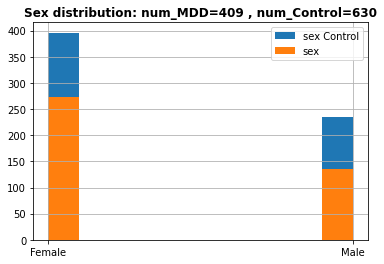

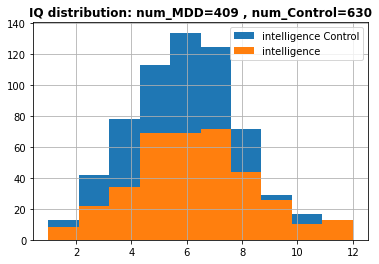

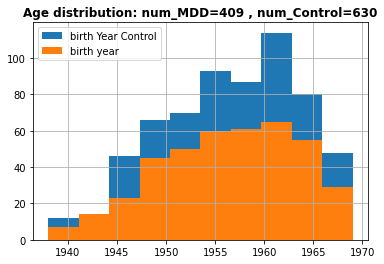

In [21]:
import matplotlib.pyplot as plt

control_subset['sex'].hist(label= 'sex Control')
guido_sub_sample['sex'].hist(legend=True)
plt.title('Sex distribution: num_MDD=409 , num_Control=630', fontsize=12, fontweight="bold")
plt.show()

control_subset['intelligence'].hist(label= 'intelligence Control')
guido_sub_sample['intelligence'].hist(legend=True)
plt.title('IQ distribution: num_MDD=409 , num_Control=630', fontsize=12,fontweight="bold")
plt.show()

control_subset['birth year'].hist(label= 'birth Year Control')
guido_sub_sample['birth year'].hist(legend=True)
plt.title('Age distribution: num_MDD=409 , num_Control=630', fontsize=12, fontweight="bold")
plt.show()

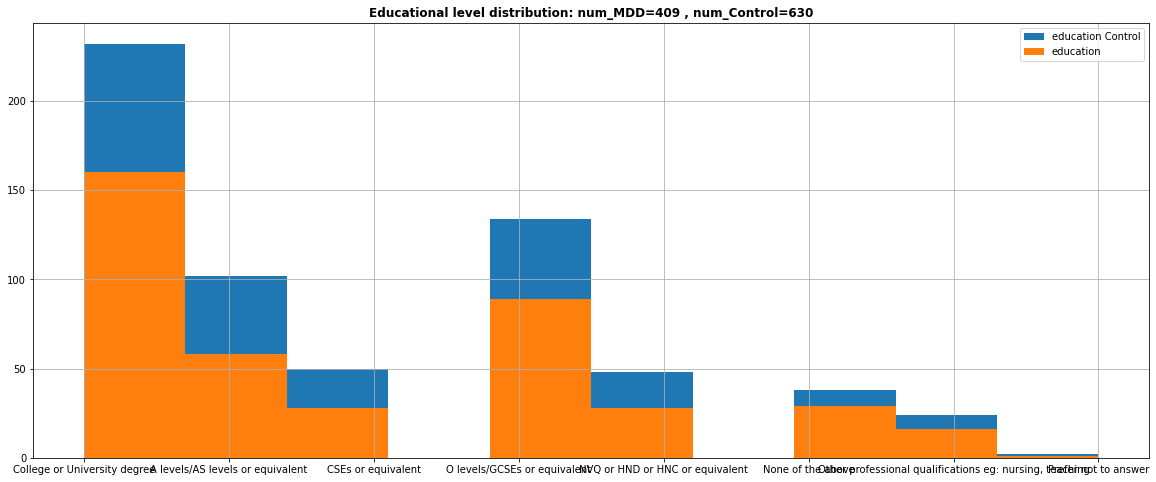

In [22]:
fig, ax = plt.subplots(figsize=(20, 8))
control_subset['education'].hist(label= 'education Control')
guido_sub_sample['education'].hist(legend=True)
plt.title('Educational level distribution: num_MDD=409 , num_Control=630', fontsize=12 ,fontweight="bold")
plt.show()

In [23]:
depression_dataset = pd.concat([guido_sub_sample, control_subset])
len(depression_dataset)

1039

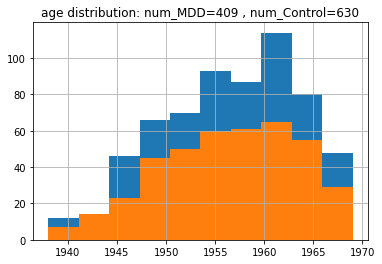

In [24]:
control_subset['birth year'].hist(label='control')
guido_sub_sample['birth year'].hist(label='MDD')
plt.title('age distribution: num_MDD=409 , num_Control=630', fontsize=12)
plt.show()

In [25]:
depression_dataset.head()

,f.2050.2.0,f.2060.2.0,f.20123.0.0,f.20124.0.0,f.20125.0.0,f.20435.0.0,f.20436.0.0,f.20437.0.0,f.20439.0.0,f.20440.0.0,...,f.20517.0.0,f.20518.0.0,f.20519.0.0,f.20532.0.0,f.20536.0.0,birth year,sex,education,intelligence,MDD
f.eid,,,,,,,,,,,,,,,,,,,,,
4235172,Nearly every day,More than half the days,NaN,NaN,NaN,Yes,All day long,Yes,Every day,Somewhat,...,Nearly every day,Several days,Nearly every day,Yes,Gained weight,1958,Male,College or University degree,3.0,1
3318947,Nearly every day,Not at all,NaN,NaN,NaN,Yes,Most of the day,Yes,Almost every day,Somewhat,...,Nearly every day,Not at all,Not at all,Yes,Lost weight,1963,Female,College or University degree,4.0,1
4921548,Nearly every day,Nearly every day,NaN,Yes,NaN,Yes,All day long,Yes,Every day,Somewhat,...,Nearly every day,Not at all,Nearly every day,Yes,Gained weight,1962,Female,O levels/GCSEs or equivalent,9.0,1
3426498,Nearly every day,Nearly every day,NaN,NaN,NaN,Yes,All day long,No,Every day,A lot,...,Several days,Not at all,Nearly every day,Yes,Lost weight,1951,Female,O levels/GCSEs or equivalent,4.0,1
1863265,Nearly every day,Nearly every day,NaN,NaN,NaN,Do not know,All day long,Prefer not to answer,Almost every day,A lot,...,Nearly every day,Not at all,More than half the days,Yes,Do not know,1968,Male,CSEs or equivalent,8.0,1


## save id for both MDD and control as data frame

In [26]:
guido_ids = pd.DataFrame(guido_sub_sample.index)
guido_ids['mdd'] = 1
control_ids = pd.DataFrame(control_subset.index)
control_ids['mdd'] = 0

## concat id mdd and control to one csv 

In [27]:
depression_ids = pd.concat([guido_ids, control_ids])

In [ ]:
depression_ids.to_csv('depression_ids.csv', index=False)
depression_ids.head()

## save seprate CSV for MDD and COntrol

In [ ]:
guido_ids.to_csv('MDD_ids.csv', index=False)
control_ids.to_csv('control_ids.csv', index=False)

In [ ]:
depression_ids['f.eid']

In [ ]:
depression_dataset['MDD'].value_counts()

In [28]:
subject_ukbb_ids=depression_ids
subject_ukbb_ids.shape

(1039, 2)

In [29]:
subject_ukbb_ids
len(subject_ukbb_ids)

1039

In [30]:
subject_ukbb_ids['f.eid']

0      4235172
1      3318947
2      4921548
3      3426498
4      1863265
        ...   
625    4302520
626    5895433
627    4970401
628    4849987
629    2494887
Name: f.eid, Length: 1039, dtype: int64

##  read ids of MDD and control 

In [33]:
MDD_ids = pd.read_csv('MDD_ids.csv')
print(MDD_ids)

       f.eid  mdd
0    4235172    1
1    3318947    1
2    4921548    1
3    3426498    1
4    1863265    1
..       ...  ...
404  5598675    1
405  3384948    1
406  5723045    1
407  3380854    1
408  3091214    1

[409 rows x 2 columns]


In [34]:
len(MDD_ids['f.eid'])

409

In [32]:
control_ids= pd.read_csv('control_ids.csv')

In [35]:
len(control_ids)

630

In [12]:
merged_ids = pd.read_csv('merged_ids.csv')
merged_ids

,f.eid,mdd
0,4235172,1
1,3318947,1
2,4921548,1
3,3426498,1
4,1863265,1
...,...,...
1034,5694545,0
1035,2730866,0
1036,5895433,0
1037,5636535,0
